<a href="https://colab.research.google.com/github/aidanMellin/data-mining-bank-account-fraud/blob/main/fraud_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Management Block
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from operator import itemgetter

# Organization
from enum import Enum

In [ ]:
# Enum for accessing available attributes
class Att(str, Enum):
    fraud_bool = 'fraud_bool'
    income = 'income'
    name_email_similarity = 'name_email_similarity'
    prev_address_months_count = 'prev_address_months_count'
    current_address_months_count = 'current_address_months_count'
    customer_age = 'customer_age'
    days_since_request = 'days_since_request'
    intended_balcon_amount = 'intended_balcon_amount'
    payment_type = 'payment_type'
    zip_count_4w = 'zip_count_4w'
    velocity_6h = 'velocity_6h'
    velocity_24h = 'velocity_24h'
    velocity_4w = 'velocity_4w'
    bank_branch_count_8w = 'bank_branch_count_8w'
    date_of_birth_distinct_emails_4w = 'date_of_birth_distinct_emails_4w'
    employment_status = 'employment_status'
    credit_risk_score = 'credit_risk_score'
    email_is_free = 'email_is_free'
    housing_status = 'housing_status'
    phone_home_valid = 'phone_home_valid'
    phone_mobile_valid = 'phone_mobile_valid'
    bank_months_count = 'bank_months_count'
    has_other_cards = 'has_other_cards'
    proposed_credit_limit = 'proposed_credit_limit'
    foreign_request = 'foreign_request'
    source = 'source'
    session_length_in_minutes = 'session_length_in_minutes'
    device_os = 'device_os'
    keep_alive_session = 'keep_alive_session'
    device_distinct_emails_8w = 'device_distinct_emails_8w'
    device_fraud_count = 'device_fraud_count'
    month = 'month'

In [ ]:
# EDA Block
all_data = pd.read_csv("Base.csv")
print(all_data.describe())

           fraud_bool          income  name_email_similarity  \
count  1000000.000000  1000000.000000         1000000.000000   
mean         0.011029        0.562696               0.493694   
std          0.104438        0.290343               0.289125   
min          0.000000        0.100000               0.000001   
25%          0.000000        0.300000               0.225216   
50%          0.000000        0.600000               0.492153   
75%          0.000000        0.800000               0.755567   
max          1.000000        0.900000               0.999999   

       prev_address_months_count  current_address_months_count  \
count             1000000.000000                1000000.000000   
mean                   16.718568                     86.587867   
std                    44.046230                     88.406599   
min                    -1.000000                     -1.000000   
25%                    -1.000000                     19.000000   
50%                    -1.0

In [ ]:
# Data cleaning (Aleksei)

# List unique values for each attribute
unique_values = {}
#for c in list(Att):
  #unique_values[c.value] = np.unique(all_data[c.value], return_counts=False)

# Most attributes have 'clean' values
#   but further analysis is required for non-trivial ones
#for k, v in unique_values.items():
    #print(k + "\n")
    #print("\t" + str(v))
    #print("\n\n")

# Attributes with a wide range of values
non_trivial_atts = [
    Att.session_length_in_minutes,
    Att.name_email_similarity,
    Att.days_since_request,
    Att.intended_balcon_amount,
    Att.zip_count_4w,
    Att.velocity_6h,
    Att.velocity_24h,
    Att.velocity_4w,
    Att.bank_branch_count_8w
  ]

print("\n### Non-trivial Attribute Analysis ###\n")

# For all non-trivial attributes
#   display min and max values
for att in non_trivial_atts:
  has_zero_value = 0 in all_data[att].values
  print(f"{att}\n")
  print(f"\thas_zero_value(s): {has_zero_value}")
  print(f"\tmin: {all_data[att].min()}")
  print(f"\tmax: {all_data[att].max()}")
  print("\n")

### Notes ###

###   Replace Missing Values with Average ###
# prev_address_months_count has a single missing value (-1)

# current_address_months_count has single missing value (-1)
#   and a single zero value

# bank_months_count has single missing value (-1)

prev_address_avg = all_data[Att.prev_address_months_count].mean()
current_address_avg = all_data[Att.current_address_months_count].mean()
bank_avg = all_data[Att.bank_months_count].mean()

all_data.loc[all_data[Att.prev_address_months_count] == -1, Att.prev_address_months_count] = prev_address_avg
all_data.loc[all_data[Att.current_address_months_count] == -1, Att.current_address_months_count] = current_address_avg
all_data.loc[all_data[Att.bank_months_count] == -1, Att.bank_months_count] = bank_avg

### Changing all negative values to zero ###
# session_length_in_minutes has several negative values all being (-1)
#   negative values don't make sense here ...

# device_distinct_emails_8w has single negative value (-1)
#   negative values don't make sense here ...

all_data.loc[all_data[Att.session_length_in_minutes] < 0, Att.session_length_in_minutes] = 0
all_data.loc[all_data[Att.device_distinct_emails_8w] < 0, Att.device_distinct_emails_8w] = 0

# print(all_data[Att.prev_address_months_count].describe())
# print("\n")

# print(all_data[Att.current_address_months_count].describe())
# print("\n")

# print(all_data[Att.bank_months_count].describe())
# print("\n")

# print(all_data[Att.session_length_in_minutes].describe())
# print("\n")

# print(all_data[Att.device_distinct_emails_8w].describe())
# print("\n")

# Only removes ~10 rows
all_data.dropna(inplace=True)


### Non-trivial Attribute Analysis ###

session_length_in_minutes

	has_zero_value(s): False
	min: -1.0
	max: 85.89914319274027


name_email_similarity

	has_zero_value(s): False
	min: 1.4345504845275636e-06
	max: 0.9999993177937188


days_since_request

	has_zero_value(s): False
	min: 4.036859788721786e-09
	max: 78.45690383509861


intended_balcon_amount

	has_zero_value(s): False
	min: -15.530554840076814
	max: 112.9569276953714


zip_count_4w

	has_zero_value(s): False
	min: 1
	max: 6700


velocity_6h

	has_zero_value(s): False
	min: -170.60307235124628
	max: 16715.565404174275


velocity_24h

	has_zero_value(s): False
	min: 1300.3073144849477
	max: 9506.896596111665


velocity_4w

	has_zero_value(s): False
	min: 2825.748405284728
	max: 6994.764200834217


bank_branch_count_8w

	has_zero_value(s): True
	min: 0
	max: 2385




# EDA directly realated to investigating our hypotheses

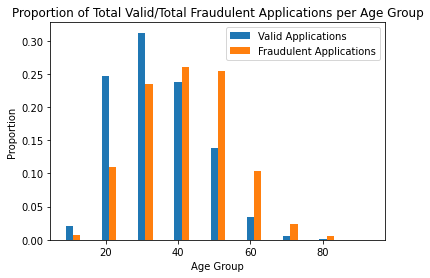

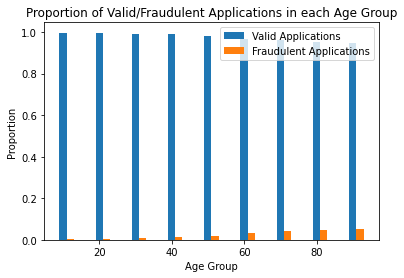

In [ ]:
# Finding potential outliers
# all_data['days_since_request'].hist(figsize=(8,8))
# plt.show()
# temp = all_data[all_data['days_since_request'] > 35]
# temp = temp['days_since_request']
# temp.hist(figsize=(8,8))
# plt.show()

fraud = all_data[all_data[Att.fraud_bool] == 1]
valid = all_data[all_data[Att.fraud_bool] == 0]

fr_attrib, fr_counts = np.unique(fraud[Att.customer_age], return_counts = True)
va_attrib, va_counts = np.unique(valid[Att.customer_age], return_counts = True)

plt.bar(va_attrib, va_counts / len(valid.index), width=2)
plt.bar(fr_attrib+2, fr_counts / len(fraud.index), width=2)
plt.xlabel("Age Group")
plt.ylabel("Proportion")
plt.title("Proportion of Total Valid/Total Fraudulent Applications per Age Group")
plt.legend(["Valid Applications", "Fraudulent Applications"])
plt.show()

print("\n\n\n")

plt.bar(va_attrib, np.divide(va_counts, [x + y for (x, y) in zip(va_counts, fr_counts)]), width=2)
plt.bar(fr_attrib+2, np.divide(fr_counts, [x + y for (x, y) in zip(va_counts, fr_counts)]), width=2)
plt.xlabel("Age Group")
plt.ylabel("Proportion")
plt.title("Proportion of Valid/Fraudulent Applications in each Age Group")
plt.legend(["Valid Applications", "Fraudulent Applications"])
plt.show()

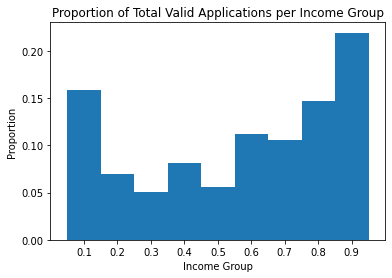

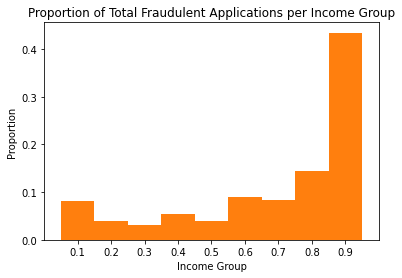

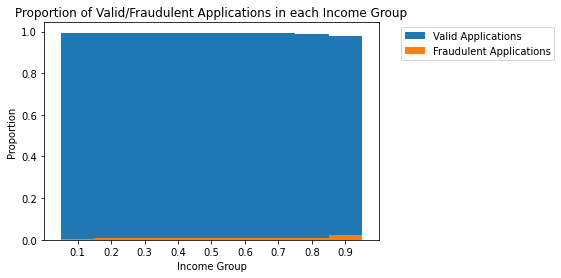

In [ ]:
fr_attrib, fr_counts = np.unique(fraud[Att.income], return_counts = True)
va_attrib, va_counts = np.unique(valid[Att.income], return_counts = True)

plt.xlim(0.0, 1.0)
plt.xticks(fr_attrib)
plt.bar(va_attrib, va_counts / len(valid.index), width=0.1)
plt.xlabel("Income Group")
plt.ylabel("Proportion")
plt.title("Proportion of Total Valid Applications per Income Group")
plt.show()

print("\n\n\n")

plt.xlim(0.0, 1.0)
plt.xticks(fr_attrib)
plt.bar(fr_attrib, fr_counts / len(fraud.index), width=0.1, color="#ff7f0e")
plt.xlabel("Income Group")
plt.ylabel("Proportion")
plt.title("Proportion of Total Fraudulent Applications per Income Group")
plt.show()

print("\n\n\n")

plt.xlim(0.0, 1.0)
plt.xticks(fr_attrib)
plt.bar(va_attrib, np.divide(va_counts, [x + y for (x, y) in zip(va_counts, fr_counts)]), width=0.1)
plt.bar(fr_attrib, np.divide(fr_counts, [x + y for (x, y) in zip(va_counts, fr_counts)]), width=0.1)
plt.xlabel("Income Group")
plt.ylabel("Proportion")
plt.title("Proportion of Valid/Fraudulent Applications in each Income Group")
plt.legend(["Valid Applications", "Fraudulent Applications"], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

# EDA for fields not related to our initial hypotheses but look interesting

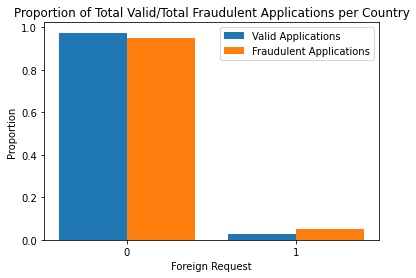

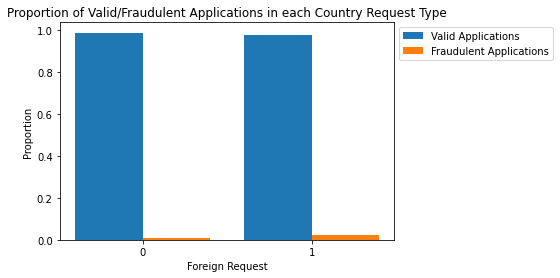

In [ ]:
fr_attrib, fr_counts = np.unique(fraud[Att.foreign_request], return_counts = True)
va_attrib, va_counts = np.unique(valid[Att.foreign_request], return_counts = True)

plt.xticks([0, 1])
plt.bar(va_attrib-.2, va_counts / len(valid.index), width=0.4)
plt.bar(fr_attrib+.2, fr_counts / len(fraud.index), width=0.4)
plt.xlabel("Foreign Request")
plt.ylabel("Proportion")
plt.title("Proportion of Total Valid/Total Fraudulent Applications per Country")
plt.legend(["Valid Applications", "Fraudulent Applications"])
plt.show()

print("\n\n\n")

plt.xticks([0, 1])
plt.bar(va_attrib-.2, np.divide(va_counts, [x + y for (x, y) in zip(va_counts, fr_counts)]), width=0.4)
plt.bar(fr_attrib+.2, np.divide(fr_counts, [x + y for (x, y) in zip(va_counts, fr_counts)]), width=0.4)
plt.xlabel("Foreign Request")
plt.ylabel("Proportion")
plt.title("Proportion of Valid/Fraudulent Applications in each Country Request Type")
plt.legend(["Valid Applications", "Fraudulent Applications"], bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

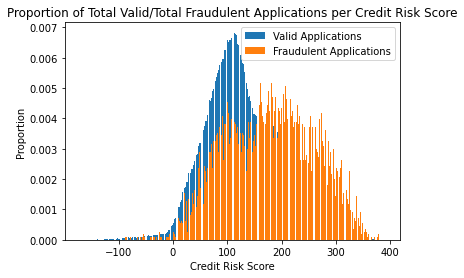

In [ ]:
fr_attrib, fr_counts = np.unique(fraud[Att.credit_risk_score], return_counts = True)
va_attrib, va_counts = np.unique(valid[Att.credit_risk_score], return_counts = True)

# plt.xticks([0, 1])
plt.bar(va_attrib, va_counts / len(valid.index))
plt.bar(fr_attrib, fr_counts / len(fraud.index))
plt.xlabel("Credit Risk Score")
plt.ylabel("Proportion")
plt.title("Proportion of Total Valid/Total Fraudulent Applications per Credit Risk Score")
plt.legend(["Valid Applications", "Fraudulent Applications"])
plt.show()

# Notes for Report

"Include several EDA techniques that you performed that relate to your original hypothesis (at least two)"
- Proportion of Total Valid/Total Fraud Applications per Age Group
  - ~75% of fraudulent applications were in their 30's-50's
  - From the second graph we see that risk of fraud increases with age
  - A comparatively much higher proportion of applicants in their 90's are victims of fraud than applications in their late teens or 20's
- Proportion of Total Valid/Total Fraud Applications per Income Group
  - Supports our hypothesis that as income increases, chance of fraud increases
  - Fraud levels at their highest in group 0.9, but still relevant in groups 0.1, 0.6, 0.7, and 0.8

- Mean applicant income = 0.562696 (remember these are normalized to 0-1)
  - With 95% confidence, mean income of full population will fall between 0.5621266374 and 0.5632653626
- Mean applicant age = 33.689080 (mean age is therefore in the 30's bin)
  - With 95% confidence, mean age of full population will fall between 33.66549741 and 33.71266259 (still in the 30's bin)

"Include EDA for other fields (at least 2) that are unrelated to your initial hypothesis but given your analysis of the data, now look interesting."
- Proportion of total valid/total fraud applications per country of request origin flag
  - Nothing crazy to see here, most requests are from inside the country so obviously that's where the most fraudulent requests originate from
  - However, there is a higher chance of a request being fraudulent if it originates from a foreign country versus the same country
- Proportion of total valid/total fraud applications per credit risk score
  - We have no idea if a high credit risk score means a high risk application or if it means good chance of being able to pay off credit
  - Either way, average valid application seems to have a CRS of ~100 while the average fraudulent applications is ~200

Removed fields:
- potentially payment_type since those are anonymized as AA, AB, AC, AD, or AE
- negative values for intended_balcon_amount (how can you transfer negative dollars as your initial amount for the application)

# Decision Tree Implementation

In [ ]:
# Make sure you run this before the next section

def report_metrics( clf, test_data_name, y_test, predicted ):
    print(
        f"\nMetrics for {test_data_name}\nRunning {clf}:\n"
        f"{metrics.classification_report(y_test, predicted, digits=3)}\n"
    )

def print_dataframe(cv_results):
    tuples = sorted(list( zip( cv_results["rank_test_accuracy"], cv_results["mean_test_accuracy"], cv_results["std_test_accuracy"],
                 cv_results["mean_score_time"], cv_results["params"] )), key=itemgetter(0))

    for ( rank_position, mean_accuracy, std_accuracy, mean_score_time, params ) in tuples:
        print(
                f"{rank_position:3d}, "
                f"accuracy: {mean_accuracy:0.3f} (±{std_accuracy:0.05f}), "
                f"avg score time: {mean_score_time:0.3f}, "
                f"for {params}"
        )
    print("")


# Used to select parameters for final training on full training dataset
# cv_results: results from sklearn cross validation function
def refit_accuracy( cv_results ):
    # Create pandas data frame
    pd_cv_results = pd.DataFrame(cv_results)
    settings = len(pd_cv_results.index)

    print("All grid-search results: ", settings, "models")
    print_dataframe(pd_cv_results)

    # Select maximum mean accuracy, then the (first) with smallest standard deviation
    max_mean_accuracy = pd_cv_results[ pd_cv_results['rank_test_accuracy'] == 1 ]
    min_std_max_accuracy = max_mean_accuracy[ "std_test_accuracy" ].idxmin()

    return min_std_max_accuracy

In [ ]:
# Preparing to model

# print(all_data.describe())

cols_to_norm = ["prev_address_months_count", "current_address_months_count", \
                "days_since_request", "intended_balcon_amount", "zip_count_4w",\
                "velocity_6h", "velocity_24h", "velocity_4w", \
                "bank_branch_count_8w", "date_of_birth_distinct_emails_4w",\
                "credit_risk_score", "bank_months_count",\
                "proposed_credit_limit", "session_length_in_minutes",\
                "device_distinct_emails_8w", "month"]

for col in cols_to_norm:
  col_max = all_data[col].max()
  col_min = all_data[col].min()
  col_range = col_max - col_min

  all_data[col] = all_data[col].apply(lambda x: (x - col_min) / col_range)


# print(all_data.describe())

# Shuffle the data
all_data = all_data.sample(frac=1).reset_index(drop=True)

# Drop non-numeric features for the moment
all_data.drop(["payment_type", "employment_status", "housing_status", "source", "device_os"], axis=1, inplace=True)

split = int(len(all_data) * .8)

train = all_data.iloc[:split]
test = all_data.iloc[split:]

resample = train[train["fraud_bool"] == 1]

# We want fraud to make up 30% of our dataset (currently makes up like .15% or something)
proportion_size = .1
resample_size = (proportion_size * len(train.index) - len(resample.index)) / (1 - proportion_size)

# Resample the fraud data to get our desired proportion
resample = resample.sample(frac=resample_size/len(resample.index), replace=True).reset_index(drop=True)

# Remove all fraud from training data
index_names = train[train["fraud_bool"] == 1].index
train.drop(index_names, inplace=True)

# Add in the resampled fraud data to get our desired proportion, and reshuffle data
train = pd.concat([train, resample], axis=0)
train = train.sample(frac=1).reset_index(drop=True)

x_train = train.drop(["fraud_bool"], axis=1, inplace=False)
y_train = train["fraud_bool"]

x_test = test.drop(["fraud_bool"], axis=1, inplace=False)
y_test = test["fraud_bool"]

<ipython-input-12-dbec3bf71e8c>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(index_names, inplace=True)


In [ ]:
# Modeling

RANDOM_SEED = 69
scores=["accuracy"]
nJobs = -1

# Grid search using sklearn built-in grid_search function
nTrees = [2, 4, 8, 16, 32]
maxDepth = [1, 2, 4, 8, 16]
nFeatures = [1]

parameter_values = [
    {"n_estimators": nTrees, "max_depth": maxDepth, "max_features": nFeatures}
]

# See classifiers.py for details on this grid_search function (wraps sklearn version)
clf = RandomForestClassifier(random_state=RANDOM_SEED)

grid_search = GridSearchCV( clf, parameter_values, scoring=scores, refit=refit_accuracy, n_jobs=nJobs )

grid_search.fit( x_train, y_train )

y_pred = grid_search.predict(x_test)

report_metrics( grid_search, "Random Forest", y_test, y_pred )

All grid-search results:  25 models
  1, accuracy: 0.937 (±0.00120), avg score time: 0.194, for {'max_depth': 16, 'max_features': 1, 'n_estimators': 2}
  2, accuracy: 0.935 (±0.00073), avg score time: 0.267, for {'max_depth': 16, 'max_features': 1, 'n_estimators': 4}
  3, accuracy: 0.935 (±0.00063), avg score time: 0.469, for {'max_depth': 16, 'max_features': 1, 'n_estimators': 8}
  4, accuracy: 0.934 (±0.00064), avg score time: 1.032, for {'max_depth': 16, 'max_features': 1, 'n_estimators': 16}
  5, accuracy: 0.934 (±0.00048), avg score time: 1.899, for {'max_depth': 16, 'max_features': 1, 'n_estimators': 32}
  6, accuracy: 0.911 (±0.00044), avg score time: 0.123, for {'max_depth': 8, 'max_features': 1, 'n_estimators': 2}
  7, accuracy: 0.910 (±0.00037), avg score time: 0.173, for {'max_depth': 8, 'max_features': 1, 'n_estimators': 4}
  8, accuracy: 0.910 (±0.00005), avg score time: 0.496, for {'max_depth': 8, 'max_features': 1, 'n_estimators': 16}
  9, accuracy: 0.910 (±0.00017), avg

In [ ]:
from six import StringIO
from sklearn import tree
import pydot

In [ ]:
dot_data = StringIO()
n = 1

best_estimator = grid_search.best_estimator_

for estimator in best_estimator.estimators_:
  tree.export_graphviz(estimator, out_file=dot_data)
  graph = pydot.graph_from_dot_data(dot_data.getvalue())
  graph[0].write_pdf(f"Estimator{n}.pdf")
  n += 1

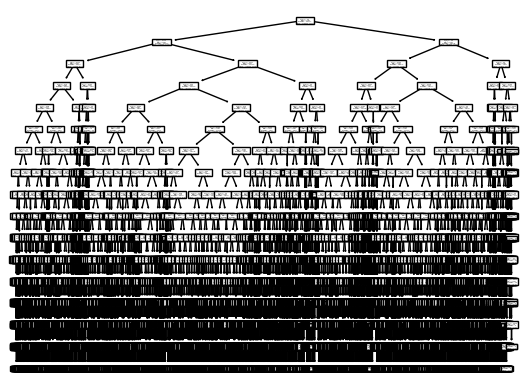

In [ ]:
for estimator in best_estimator.estimators_:
  tree.plot_tree(estimator)

In [ ]:
print(x_test.columns)

for estimator in best_estimator.estimators_:
  print(estimator.feature_importances_)

Index(['income', 'name_email_similarity', 'prev_address_months_count',
       'current_address_months_count', 'customer_age', 'days_since_request',
       'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       'email_is_free', 'phone_home_valid', 'phone_mobile_valid',
       'bank_months_count', 'has_other_cards', 'proposed_credit_limit',
       'foreign_request', 'session_length_in_minutes', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')
[0.04713298 0.05162001 0.01308375 0.06515974 0.08220623 0.04444505
 0.05371374 0.04391787 0.04303669 0.03871067 0.04536712 0.03564248
 0.04888151 0.07298703 0.01794714 0.05319586 0.00649161 0.03921262
 0.0235299  0.05349247 0.00650583 0.04303331 0.02231997 0.02365752
 0.         0.02470888]
[0.05733928 0.04874036 0.02727688 0.05049453 0.03949484 0.0404367

In [ ]:
with pd.option_context('display.max_columns', 40):
    print(train[train["fraud_bool"] == 0].describe())

       fraud_bool         income  name_email_similarity  \
count    791191.0  791191.000000          791191.000000   
mean          0.0       0.561630               0.494840   
std           0.0       0.290273               0.288855   
min           0.0       0.100000               0.000001   
25%           0.0       0.300000               0.227065   
50%           0.0       0.600000               0.493468   
75%           0.0       0.800000               0.756274   
max           0.0       0.900000               0.999999   

       prev_address_months_count  current_address_months_count   customer_age  \
count              791191.000000                 791191.000000  791191.000000   
mean                    0.064604                      0.202465      33.605754   
std                     0.104486                      0.206106      11.980098   
min                     0.000000                      0.000000      10.000000   
25%                     0.031002                      0.046729 

In [ ]:
with pd.option_context('display.max_columns', 40):
    print(train[train["fraud_bool"] == 1].describe())

       fraud_bool        income  name_email_similarity  \
count     79101.0  79101.000000           79101.000000   
mean          1.0      0.690865               0.393120   
std           0.0      0.263086               0.295504   
min           1.0      0.100000               0.000132   
25%           1.0      0.600000               0.133868   
50%           1.0      0.800000               0.292412   
75%           1.0      0.900000               0.674467   
max           1.0      0.900000               0.999942   

       prev_address_months_count  current_address_months_count  customer_age  \
count               79101.000000                  79101.000000  79101.000000   
mean                    0.046210                      0.268950     40.800875   
std                     0.081102                      0.200078     13.042169   
min                     0.007937                      0.000000     10.000000   
25%                     0.031002                      0.123832     30.000000 

In [ ]:
# Creating tree visual: .dot file --> .png file
from sklearn.tree import export_graphviz

features = x_train.columns.values.tolist()
target = ["0", "1"]

tree = grid_search.best_estimator_
tree = tree.estimators_[0]


# Export as dot file
export_graphviz(tree,
                out_file='tree.dot',
                max_depth = 16,
                feature_names = features,
                class_names = target,
                filled = True)
                # rounded = True,
                # proportion = False,
                # precision = 2,
                # filled = True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

In [ ]:
# Neural Network Using Scikit's MLPClassifier (multi-layer perceptron)
# Target Variable 'fraud_bool'

# df.head() prints all columns
pd.set_option('display.max_columns', None)

# Deep copy of original data frame
df = all_data.copy(deep=True)

# Only removes ~10 rows
df.dropna(inplace=True)

# Flag variables for housing_status
# Unique vals: ['BA' 'BB' 'BC' 'BD' 'BE' 'BF' 'BG']
df['ba_'] = np.where(df[Att.housing_status] == 'BA', 1, 0)
df['bb_'] = np.where(df[Att.housing_status] == 'BB', 1, 0)
df['bc_'] = np.where(df[Att.housing_status] == 'BC', 1, 0)
df['bd_'] = np.where(df[Att.housing_status] == 'BD', 1, 0)
df['be_'] = np.where(df[Att.housing_status] == 'BE', 1, 0)
df['bf_'] = np.where(df[Att.housing_status] == 'BF', 1, 0)
df.drop(columns=[Att.housing_status], axis=1, inplace=True)

# Flag variables for employment_status
# Unique vals: ['CA' 'CB' 'CC' 'CD' 'CE' 'CF' 'CG']
df['ca_'] = np.where(df[Att.employment_status] == 'CA', 1, 0)
df['cb_'] = np.where(df[Att.employment_status] == 'CB', 1, 0)
df['cc_'] = np.where(df[Att.employment_status] == 'CC', 1, 0)
df['cd_'] = np.where(df[Att.employment_status] == 'CD', 1, 0)
df['ce_'] = np.where(df[Att.employment_status] == 'CE', 1, 0)
df['cf_'] = np.where(df[Att.employment_status] == 'CF', 1, 0)
df.drop(columns=[Att.employment_status], axis=1, inplace=True)

# Flag variables for device_os
# Unique vals: ['linux' 'macintosh' 'windows' 'x11' 'other']
df['linux_'] = np.where(df[Att.device_os] == 'linux', 1, 0)
df['macintosh_'] = np.where(df[Att.device_os] == 'macintosh', 1, 0)
df['windows_'] = np.where(df[Att.device_os] == 'windows', 1, 0)
df['x11_'] = np.where(df[Att.device_os] == 'x11', 1, 0)
df.drop(columns=[Att.device_os], axis=1, inplace=True)

# Flag variables for source
# Unique vals: ['INTERNET' 'TELEAPP']
df['internet'] = np.where(df[Att.source] == 'INTERNET', 1, 0)
df.drop(columns=[Att.source], axis=1, inplace=True)

# Flag variables for payment_type
# Unique vals: ['AA' 'AB' 'AC' 'AD' 'AE']
df['aa_'] = np.where(df[Att.payment_type] == 'AA', 1, 0)
df['ab_'] = np.where(df[Att.payment_type] == 'AB', 1, 0)
df['ac_'] = np.where(df[Att.payment_type] == 'AC', 1, 0)
df['ad_'] = np.where(df[Att.payment_type] == 'AD', 1, 0)
df.drop(columns=[Att.payment_type], axis=1, inplace=True)

# Normalize data using MinMax
scaler = MinMaxScaler()
arr_scaled = scaler.fit_transform(df)
df = pd.DataFrame(arr_scaled, columns=df.columns,index=df.index)

# Shuffle the data
df = df.sample(frac=1).reset_index(drop=True)

# Split data into training and testing
train, test = train_test_split(df, train_size = 0.3, test_size = 0.7)

##### Resample Training

# Fetch all fraudulent records for resample
resample = train[train["fraud_bool"] == 1]

# We want fraud to make up 30% of our dataset (currently makes up like .15% or something)
proportion_size = .1
resample_size = (proportion_size * len(train.index) - len(resample.index)) / (1 - proportion_size)

# Resample the fraud data to get our desired proportion
resample = resample.sample(frac=resample_size/len(resample.index), replace=True).reset_index(drop=True)

# Remove all fraud from training data
index_names = train[train["fraud_bool"] == 1].index
train.drop(index_names, inplace=True)

# Add in the resampled fraud data to get our desired proportion, and reshuffle data
train = pd.concat([train, resample], axis=0)
train = train.sample(frac=1).reset_index(drop=True)

##### End Resample Training

train_np = train.to_numpy()
train_without_target = train.drop(columns=[Att.fraud_bool], axis=1)

test_without_target = test.drop(columns=[Att.fraud_bool], axis=1)

# Convert train_np_without_target into floating point values

# Training Samples
X = train_without_target

# Expected labels (list of 1s and 0s indicating if that row was fraud or not)
y = train_np[:, 0]

# solvers
# adam: May converge faster but generalize poorly
# lbfgs: Not suitable for large datasets (limited memory)
# sgd: longer training times but should generalize better
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(11, 12, 11), random_state=1, max_iter=200)
clf.fit(X, y)

# Test trained network
expected = test[Att.fraud_bool].tolist()
predicted = clf.predict(test_without_target).tolist()

assert len(expected) == len(predicted), "What the fuck ..."
zipped = list(zip(expected, predicted))

num_correct = sum(list(map(lambda x: 1 if x[0] == x[1] else 0, zipped)))
print(f'Correctness: {(num_correct / len(expected)) * 100}%')


resample_size: 657.2222222222222
Correctness: 95.77132256840507%
